In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.polynomial.polynomial import polyfit
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

In [59]:
from sklearn.model_selection import train_test_split
davis_df = pd.read_csv("carData.csv")                   
davis_train, davis_test = train_test_split(davis_df, train_size=0.5, stratify=davis_df.sex)
davis_df.head()  

,Unnamed: 0,sex,weight,height,repwt,repht
0,1,M,77,182,77.0,180.0
1,2,F,58,161,51.0,159.0
2,3,F,53,161,54.0,158.0
3,4,M,68,177,70.0,175.0
4,5,F,59,157,59.0,155.0


<AxesSubplot:xlabel='weight', ylabel='repwt'>

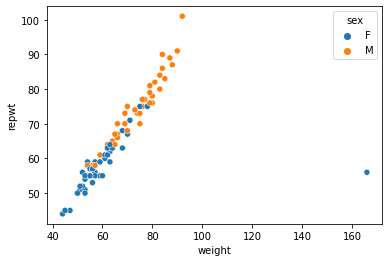

In [60]:
sns.scatterplot(data=davis_train, x='weight', y='repwt', hue='sex')

In [69]:
lm = ols("repwt ~ weight*sex", data=davis_df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  repwt   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     470.4
Date:                Sun, 29 May 2022   Prob (F-statistic):           1.27e-84
Time:                        14:53:41   Log-Likelihood:                -539.31
No. Observations:                 183   AIC:                             1087.
Df Residuals:                     179   BIC:                             1099.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          41.3228      2.168     

In [55]:
mask = davis_df.isin(["NA"])
davis_df_new = davis_df[~mask]
davis_df_new.head()

,Unnamed: 0,sex,weight,height,repwt,repht
0,1,M,77,182,77.0,180.0
1,2,F,58,161,51.0,159.0
2,3,F,53,161,54.0,158.0
3,4,M,68,177,70.0,175.0
4,5,F,59,157,59.0,155.0


<AxesSubplot:xlabel='weight', ylabel='repwt'>

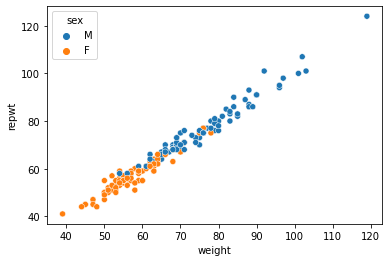

In [56]:
sns.scatterplot(data=davis_df_new, x='weight', y='repwt', hue='sex')

In [58]:
lm = ols("repwt ~ weight*sex", data=davis_df_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  repwt   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     2224.
Date:                Sat, 28 May 2022   Prob (F-statistic):          1.26e-139
Time:                        23:35:27   Log-Likelihood:                -398.54
No. Observations:                 180   AIC:                             805.1
Df Residuals:                     176   BIC:                             817.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.0484      1.892     

<AxesSubplot:title={'center':'Female repht - height'}>

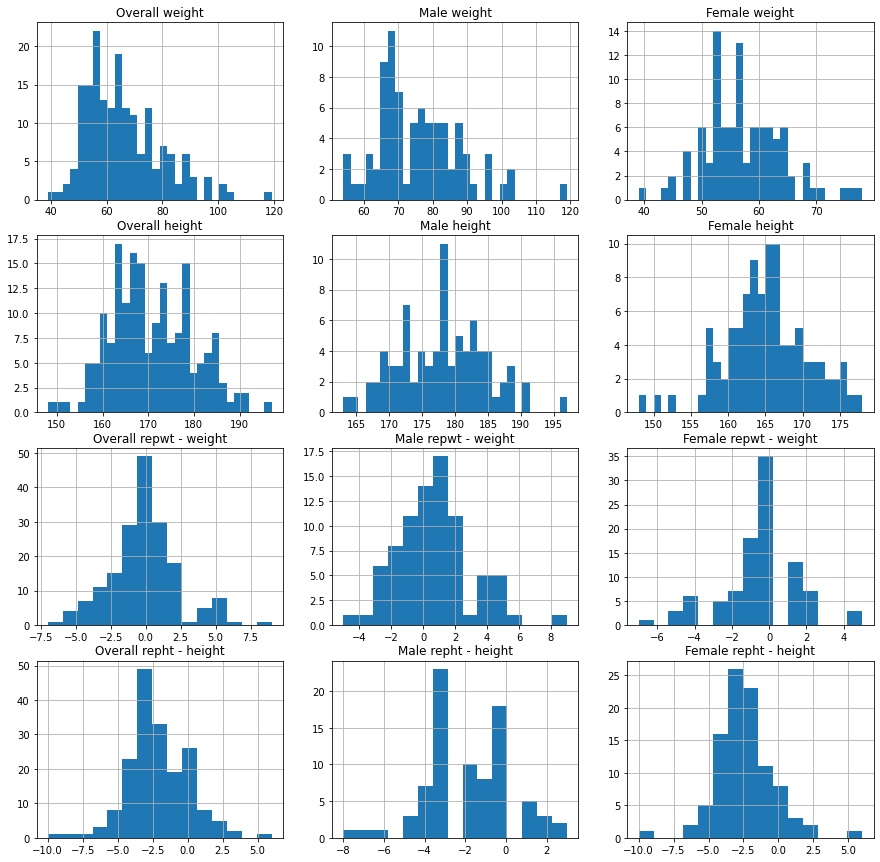

In [23]:
overall_weight_df = davis_df.weight
male_weight_df = davis_df[davis_df.sex == 'M'].weight
female_weight_df = davis_df[davis_df.sex == 'F'].weight

overall_height_df = davis_df.height
male_height_df = davis_df[davis_df.sex == 'M'].height
female_height_df = davis_df[davis_df.sex == 'F'].height

overall_weight_lie_df = davis_df.repwt - davis_df.weight
male_weight_lie_df = davis_df[davis_df.sex == 'M'].repwt - davis_df[davis_df.sex == 'M'].weight
female_weight_lie_df = davis_df[davis_df.sex == 'F'].repwt -davis_df[davis_df.sex == 'F'].weight

overall_height_lie_df = davis_df.repht - davis_df.height
male_height_lie_df = davis_df[davis_df.sex == 'M'].repht - davis_df[davis_df.sex == 'M'].height
female_height_lie_df = davis_df[davis_df.sex == 'F'].repht -davis_df[davis_df.sex == 'F'].height

fig, axes = plt.subplots(4, 3, figsize=(15,15))

axes[0,0].set_title("Overall weight")
axes[0,1].set_title("Male weight")
axes[0,2].set_title("Female weight")

axes[1,0].set_title("Overall height")
axes[1,1].set_title("Male height")
axes[1,2].set_title("Female height")

axes[2,0].set_title("Overall repwt - weight")
axes[2,1].set_title("Male repwt - weight")
axes[2,2].set_title("Female repwt - weight")

axes[3,0].set_title("Overall repht - height")
axes[3,1].set_title("Male repht - height")
axes[3,2].set_title("Female repht - height")

overall_weight_df.hist(bins=30, ax=axes[0,0])
male_weight_df.hist(bins=30, ax=axes[0,1])
female_weight_df.hist(bins=30, ax=axes[0,2])

overall_height_df.hist(bins=30, ax=axes[1,0])
male_height_df.hist(bins=30, ax=axes[1,1])
female_height_df.hist(bins=30, ax=axes[1,2])

overall_weight_lie_df.hist(bins=15, ax=axes[2,0])
male_weight_lie_df.hist(bins=15, ax=axes[2,1])
female_weight_lie_df.hist(bins=15, ax=axes[2,2])

overall_height_lie_df.hist(bins=15, ax=axes[3,0])
male_height_lie_df.hist(bins=15, ax=axes[3,1])
female_height_lie_df.hist(bins=15, ax=axes[3,2])

In [9]:
d1.loc[d1['height']<100,]
d1.loc[d1['height']<100] = 12,"F",57,166,56,163

In [28]:
theta_m = len(davis_df[davis_df.sex == "M"])/len(davis_df)
theta_f = len(davis_df[davis_df.sex == "F"])/len(davis_df)

height_mean_m = np.mean(davis_df[davis_df.sex == "M"].height)
height_mean_f = np.mean(davis_df[davis_df.sex == "F"].height)

weight_mean_m = np.mean(davis_df[davis_df.sex == "M"].weight)
weight_mean_f = np.mean(davis_df[davis_df.sex == "F"].weight)

cov_m = np.cov(davis_df[davis_df.sex == "M"].weight, davis_df[davis_df.sex == "M"].height)
cov_f = np.cov(davis_df[davis_df.sex == "F"].weight, davis_df[davis_df.sex == "F"].height)

In [24]:
class HumanGenerator:
    def __init__(self):
        self.p_female = None;
        self.mean_height = {
            "female": None,
            "male": None
        }
        self.mean_weight = {
            "female": None,
            "male": None
        }
        self.covariance = {
            "female": None,
            "male": None
        }
    
    def fit(self, X):
        female_samples = X[X.sex == "F"]
        male_samples = X[X.sex == "M"]
        
        self.p_female = len(female_samples)/len(X)
        
        self.mean_height["female"] = np.mean(female_samples.height)
        self.mean_height["male"] = np.mean(male_samples.height)

        self.mean_weight["female"] = np.mean(female_samples.weight)
        self.mean_weight["male"] = np.mean(male_samples.weight)

        self.covariance["female"]  = np.cov(female_samples.weight, female_samples.height)
        self.covariance["male"]  = np.cov(male_samples.weight, male_samples.height)
        
    def generate_samples(self, n):
        result = np.empty((n, 2))
        result_sex = np.empty(n, dtype = object)
        for i in range(n):
            sex = np.random.choice(["female", "male"], p=[self.p_female, 1 - self.p_female])
            if(sex == "female"):
                result_sex[i] = "F"
            else:
                result_sex[i] = "M"
            result[i] = np.random.multivariate_normal(mean=[self.mean_weight[sex], self.mean_height[sex]], cov=self.covariance[sex])
        return pd.DataFrame(dict(sex = result_sex.ravel(), weight = result[:, 0].ravel(), height = result[:, 1].ravel()))
    
    def log_likehood(self, X):
        female_samples = X[X.sex == "F"][["weight", "height"]]
        male_samples = X[X.sex == "M"][["weight", "height"]]
        
        female_log_likehood = np.log(
            scipy.stats.multivariate_normal.pdf(
                female_samples, 
                mean=[self.mean_weight["female"],self.mean_height["female"]], 
                cov=self.covariance["female"])).sum()
        male_log_likehood = np.log(
            scipy.stats.multivariate_normal.pdf(
                male_samples, 
                mean=[self.mean_weight["male"],self.mean_height["male"]], 
                cov=self.covariance["male"])).sum()
        
        return female_log_likehood + male_log_likehood
    
    def mean_log_likehood(self, X):
        return self.log_likehood(X) / len(X)

In [25]:
generator = HumanGenerator()
generator.fit(davis_train)

new_samples = generator.generate_samples(10000)
print(f"Train: {generator.mean_log_likehood(davis_train)}")
print(f"Test: {generator.mean_log_likehood(davis_test)}")
print(f"Generated: {generator.mean_log_likehood(new_samples)}")

Train: -6.724964107697888
Test: -6.630936083681783
Generated: -6.743578442658216


<AxesSubplot:title={'center':'Additional generated data'}, xlabel='weight', ylabel='height'>

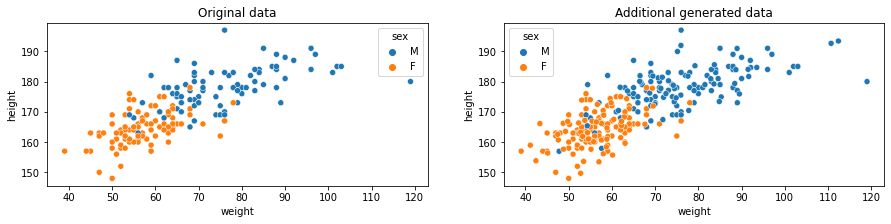

In [29]:
fig, axis = plt.subplots(1, 2, figsize=(15,3))

axis[0].set_title("Original data")
axis[1].set_title("Additional generated data")

sns.scatterplot(data=davis_df, x='weight', y='height', hue='sex', ax=axis[0])

new_men = np.random.multivariate_normal(mean=[weight_mean_m, height_mean_m], cov=cov_m, size=50)
new_men_df = pd.DataFrame(new_men, columns=['weight', 'height'])
new_men_df['sex'] = 'M'
new_women = np.random.multivariate_normal(mean=[weight_mean_f, height_mean_f], cov=cov_f, size=50)
new_women_df = pd.DataFrame(new_women, columns=['weight', 'height'])
new_women_df['sex'] = 'F'
new_davis_df = (davis_df.append(new_men_df)).append(new_women_df)
sns.scatterplot(data=new_davis_df, x='weight', y='height', hue='sex', ax=axis[1])